# Breast Cancer Classification

This project aimed to compare the different classification models and find which type of classification method provided the best accuracy, and best suits the data set. The types of classification used are: logistic regression, k-nearest neighbors, support vector regression, kernal svm, decision tree regression, and random forest regression.
This project includes data preprocessing, basic visualization, splitting the dataset into training and testing data to overcome overfitting, creating several regression models, and comparing the accuracy of all models.

## Setting Working Directory

In [1]:
from os import chdir

chdir(r"G:\My Drive\Udemy\Project - Breast Cancer Classification")

## Importing the libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings

warnings.filterwarnings('ignore')
plt.style.use('ggplot')

## Importing the dataset

The data file is a .DATA file.

In [3]:
df = pd.read_csv("breast-cancer-wisconsin.data", header=None)
df.columns = [
    "ID", "Clump Thickness", "Uniformity of Cell Size",
    "Uniformity of Cell Shape", "Marginal Adhesion",
    "Single Epithelial Cell Size", "Bare Nuclei", "Bland Chromatin",
    "Normal Nucleoli", "Mitoses", "Class"
]

## Checking for missing data

The data source mentions that some missing values are encoded as "?", hence let us replace it with NaN to have a common form of missing data. Since inclusion of "?" makes the originally numeric column data type as an object data type, we must convert the "Bare Nuclei" to numeric before to work on missing data.

In [4]:
df = df.replace("?", np.NaN)

In [5]:
df.dtypes

ID                              int64
Clump Thickness                 int64
Uniformity of Cell Size         int64
Uniformity of Cell Shape        int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Bland Chromatin                 int64
Normal Nucleoli                 int64
Mitoses                         int64
Class                           int64
dtype: object

We see that "Bare Nuclei" is an object. Therefore, we know that its intergers might be in string format. Therefore, we must convert it to a numeric format.

In [6]:
df["Bare Nuclei"] = pd.to_numeric(df["Bare Nuclei"])

In [7]:
df.dtypes

ID                               int64
Clump Thickness                  int64
Uniformity of Cell Size          int64
Uniformity of Cell Shape         int64
Marginal Adhesion                int64
Single Epithelial Cell Size      int64
Bare Nuclei                    float64
Bland Chromatin                  int64
Normal Nucleoli                  int64
Mitoses                          int64
Class                            int64
dtype: object

Now, let us check which columns have missing data.

In [8]:
df.isna().sum()

ID                              0
Clump Thickness                 0
Uniformity of Cell Size         0
Uniformity of Cell Shape        0
Marginal Adhesion               0
Single Epithelial Cell Size     0
Bare Nuclei                    16
Bland Chromatin                 0
Normal Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

Let's visualize the missing values using the missingno module.

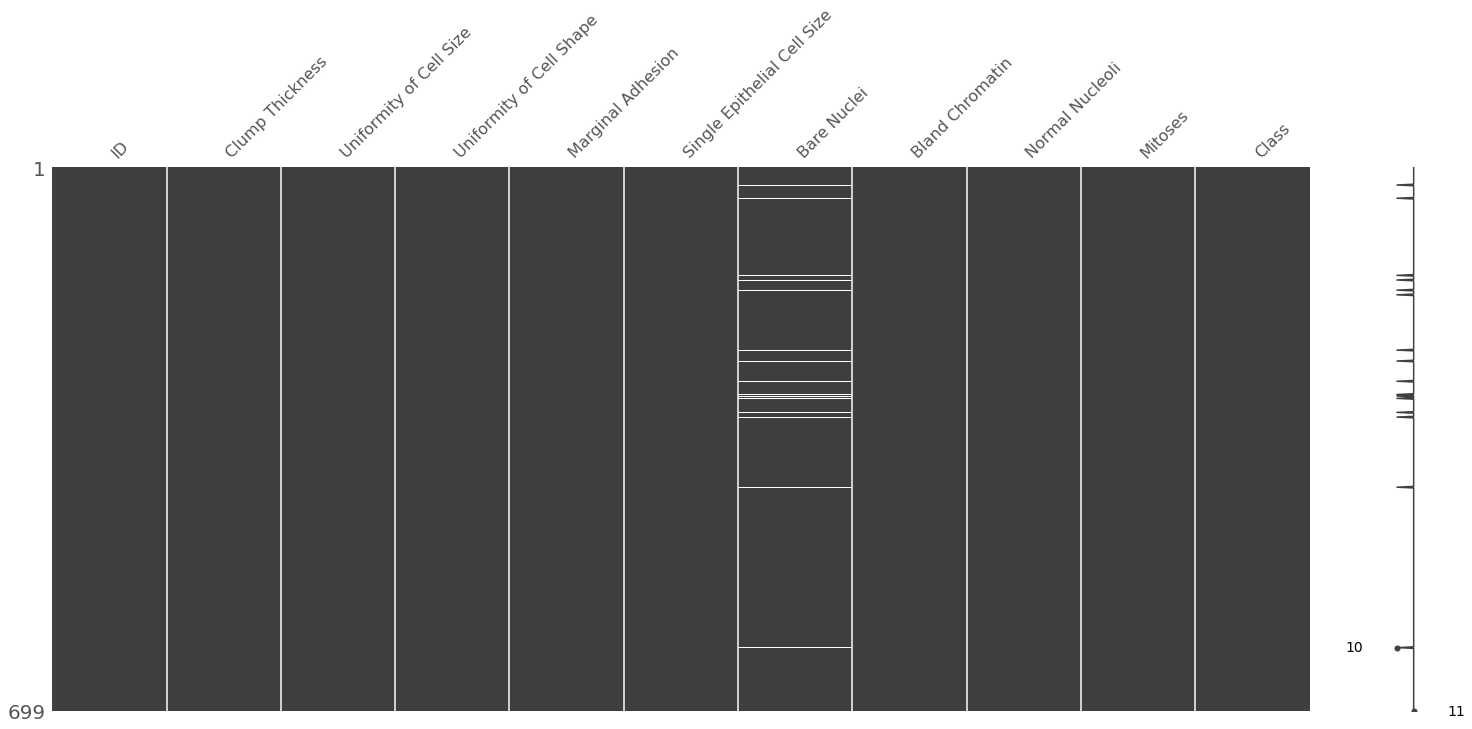

In [9]:
from missingno import matrix

matrix(df);

Therefore, we have missing values in the "Bare Nuclei" variable. Let us use the mean imputation method to tackle this issue. We know that it is the 6th index in our dataframe.

In [10]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy="mean")
imputer = imputer.fit(df[["Bare Nuclei"]])
df[["Bare Nuclei"]] = imputer.transform(df[["Bare Nuclei"]]).ravel()

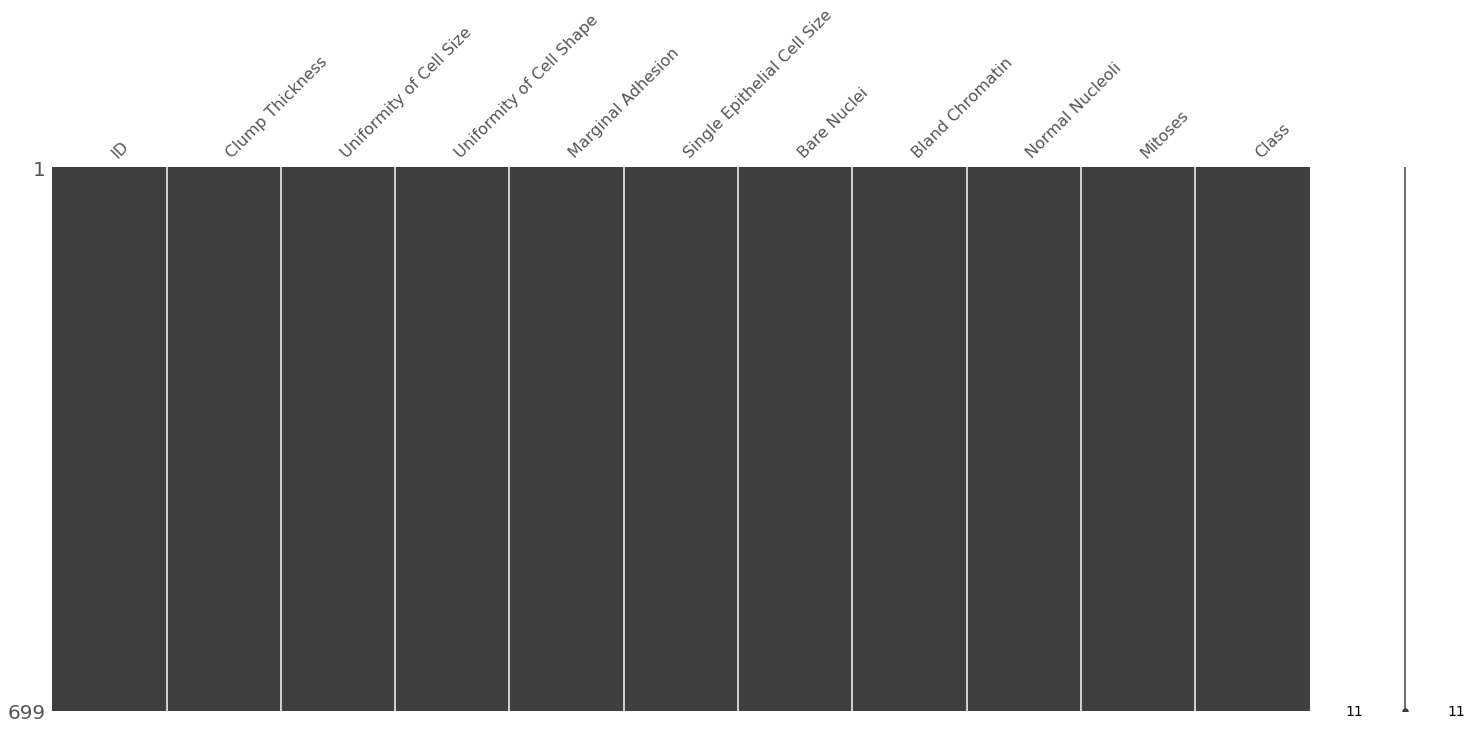

In [11]:
from missingno import matrix

matrix(df);

Therefore, we have overcome the missing values.

## Descriptive Statistics

Inspecting first 5 rows

In [12]:
df.head()

,ID,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2


Data Description

In [13]:
df.describe()

,ID,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.544656,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,3.601852,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


## Choosing our dependent and independent variables

In [14]:
X = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

In [15]:
print(X[:5])

[[ 5.  1.  1.  1.  2.  1.  3.  1.  1.]
 [ 5.  4.  4.  5.  7. 10.  3.  2.  1.]
 [ 3.  1.  1.  1.  2.  2.  3.  1.  1.]
 [ 6.  8.  8.  1.  3.  4.  3.  7.  1.]
 [ 4.  1.  1.  3.  2.  1.  3.  1.  1.]]


In [16]:
print(y[:5])

[2 2 2 2 2]


## Boxplots

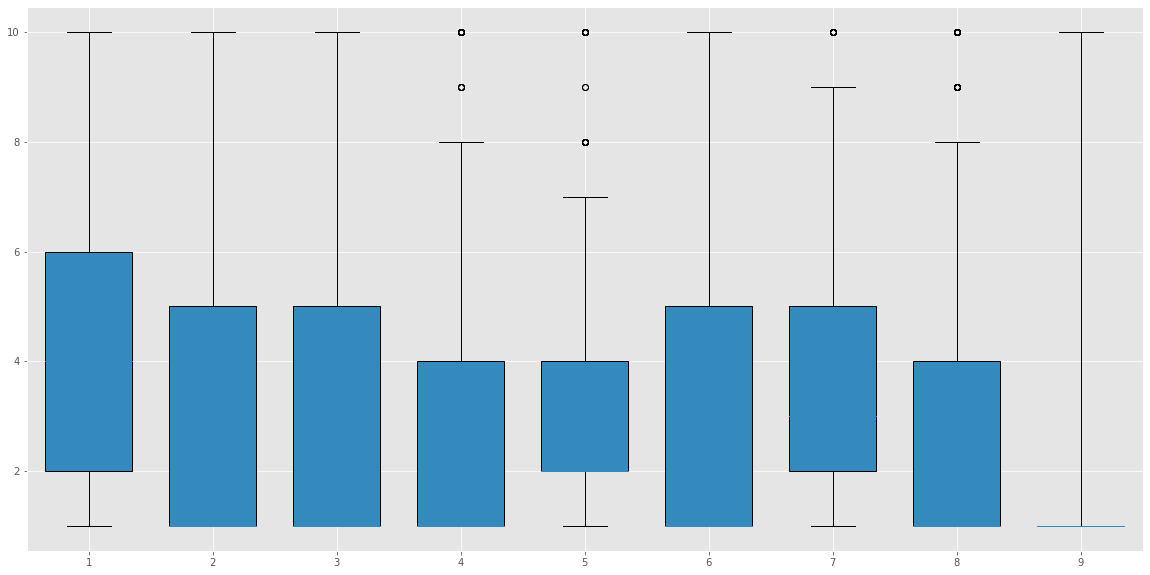

In [17]:
plt.rcParams['figure.figsize'] = (20, 10)
plt.boxplot(X, widths=0.7, patch_artist=True, autorange=True, manage_ticks=True);

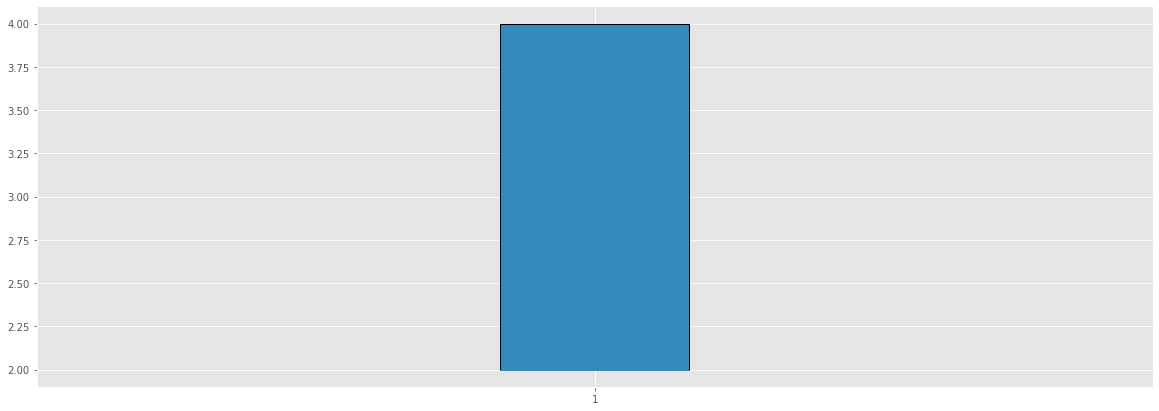

In [18]:
plt.rcParams['figure.figsize'] = (20, 7)
plt.boxplot(y, widths=0.17, patch_artist=True, autorange=True, manage_ticks=True);

## Splitting the dataset into the Training set and Test set

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=192)

## Feature Scaling

In [20]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Logistic Regression Model

In [21]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression(random_state=192)
logistic.fit(X_train, y_train)

LogisticRegression(random_state=192)

## Logistic Regression Prediction

In [22]:
from Predictions_and_Confusion_Matrix import Predict, ConfusionMatrixAndAccuracy

Predict(logistic, X_test, y_test)

First 10 Actual vs. Predicted:

Observation # 	 Actual 	 Predicted
1 		 4 		 4
2 		 2 		 2
3 		 2 		 2
4 		 4 		 2
5 		 2 		 2
6 		 2 		 2
7 		 2 		 2
8 		 2 		 2
9 		 2 		 2
10 		 2 		 2


## Logistic Regression Confusion Matrix

In [23]:
ConfusionMatrixAndAccuracy(y_test)


    Confusion Matrix
             Predicted 0 Predicted 1
    Actual 0     96          2
    Actual 1     3          39
    
R-squared: 96.43%
Number of false positives: 2
Number of false positives: 3


## K-Nearest Neighbors (KNN) Model

In [24]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knn.fit(X_train, y_train)

KNeighborsClassifier()

## K-Nearest Neighbors (KNN) Prediction

In [25]:
Predict(knn, X_test, y_test)

First 10 Actual vs. Predicted:

Observation # 	 Actual 	 Predicted
1 		 4 		 4
2 		 2 		 2
3 		 2 		 2
4 		 4 		 4
5 		 2 		 2
6 		 2 		 2
7 		 2 		 2
8 		 2 		 2
9 		 2 		 2
10 		 2 		 2


## K-Nearest Neighbors (KNN) Confusion Matrix

In [26]:
ConfusionMatrixAndAccuracy(y_test)


    Confusion Matrix
             Predicted 0 Predicted 1
    Actual 0     96          2
    Actual 1     2          40
    
R-squared: 97.14%
Number of false positives: 2
Number of false positives: 2


## Support Vector Machine (SVM) Model

In [27]:
from sklearn.svm import SVC

svm = SVC(kernel = 'linear', random_state = 192)
svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=192)

## Support Vector Machine (SVM) Prediction

In [28]:
Predict(svm, X_test, y_test)

First 10 Actual vs. Predicted:

Observation # 	 Actual 	 Predicted
1 		 4 		 4
2 		 2 		 2
3 		 2 		 2
4 		 4 		 4
5 		 2 		 2
6 		 2 		 2
7 		 2 		 2
8 		 2 		 2
9 		 2 		 2
10 		 2 		 2


## Support Vector Machine (SVM) Confusion Matrix

In [29]:
ConfusionMatrixAndAccuracy(y_test)


    Confusion Matrix
             Predicted 0 Predicted 1
    Actual 0     96          2
    Actual 1     2          40
    
R-squared: 97.14%
Number of false positives: 2
Number of false positives: 2


## Kernel Support Vector Machine (Kernal SVM) Model

In [30]:
from sklearn.svm import SVC

k_svm = SVC(kernel = 'rbf', random_state = 192)
k_svm.fit(X_train, y_train)

SVC(random_state=192)

## Kernal SVM Prediction

In [31]:
Predict(k_svm, X_test, y_test)

First 10 Actual vs. Predicted:

Observation # 	 Actual 	 Predicted
1 		 4 		 4
2 		 2 		 2
3 		 2 		 2
4 		 4 		 4
5 		 2 		 2
6 		 2 		 2
7 		 2 		 2
8 		 2 		 2
9 		 2 		 2
10 		 2 		 2


## Kernal SVM Confusion Matrix

In [32]:
ConfusionMatrixAndAccuracy(y_test)


    Confusion Matrix
             Predicted 0 Predicted 1
    Actual 0     96          2
    Actual 1     2          40
    
R-squared: 97.14%
Number of false positives: 2
Number of false positives: 2


## Naive Bayes Model

In [33]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

## Naive Bayes Prediction

In [34]:
Predict(nb, X_test, y_test)

First 10 Actual vs. Predicted:

Observation # 	 Actual 	 Predicted
1 		 4 		 4
2 		 2 		 2
3 		 2 		 2
4 		 4 		 2
5 		 2 		 2
6 		 2 		 2
7 		 2 		 2
8 		 2 		 2
9 		 2 		 2
10 		 2 		 2


## Naive Bayes Confusion Matrix

In [35]:
ConfusionMatrixAndAccuracy(y_test)


    Confusion Matrix
             Predicted 0 Predicted 1
    Actual 0     95          3
    Actual 1     3          39
    
R-squared: 95.71%
Number of false positives: 3
Number of false positives: 3


## Decision Tree Model

In [36]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 192)
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=192)

## Decision Tree Prediction

In [37]:
Predict(dt, X_test, y_test)

First 10 Actual vs. Predicted:

Observation # 	 Actual 	 Predicted
1 		 4 		 4
2 		 2 		 2
3 		 2 		 2
4 		 4 		 2
5 		 2 		 2
6 		 2 		 2
7 		 2 		 2
8 		 2 		 2
9 		 2 		 2
10 		 2 		 2


## Decision Tree Confusion Matrix

In [38]:
ConfusionMatrixAndAccuracy(y_test)


    Confusion Matrix
             Predicted 0 Predicted 1
    Actual 0     96          2
    Actual 1     8          34
    
R-squared: 92.86%
Number of false positives: 2
Number of false positives: 8


## Plotting the Decision Tree

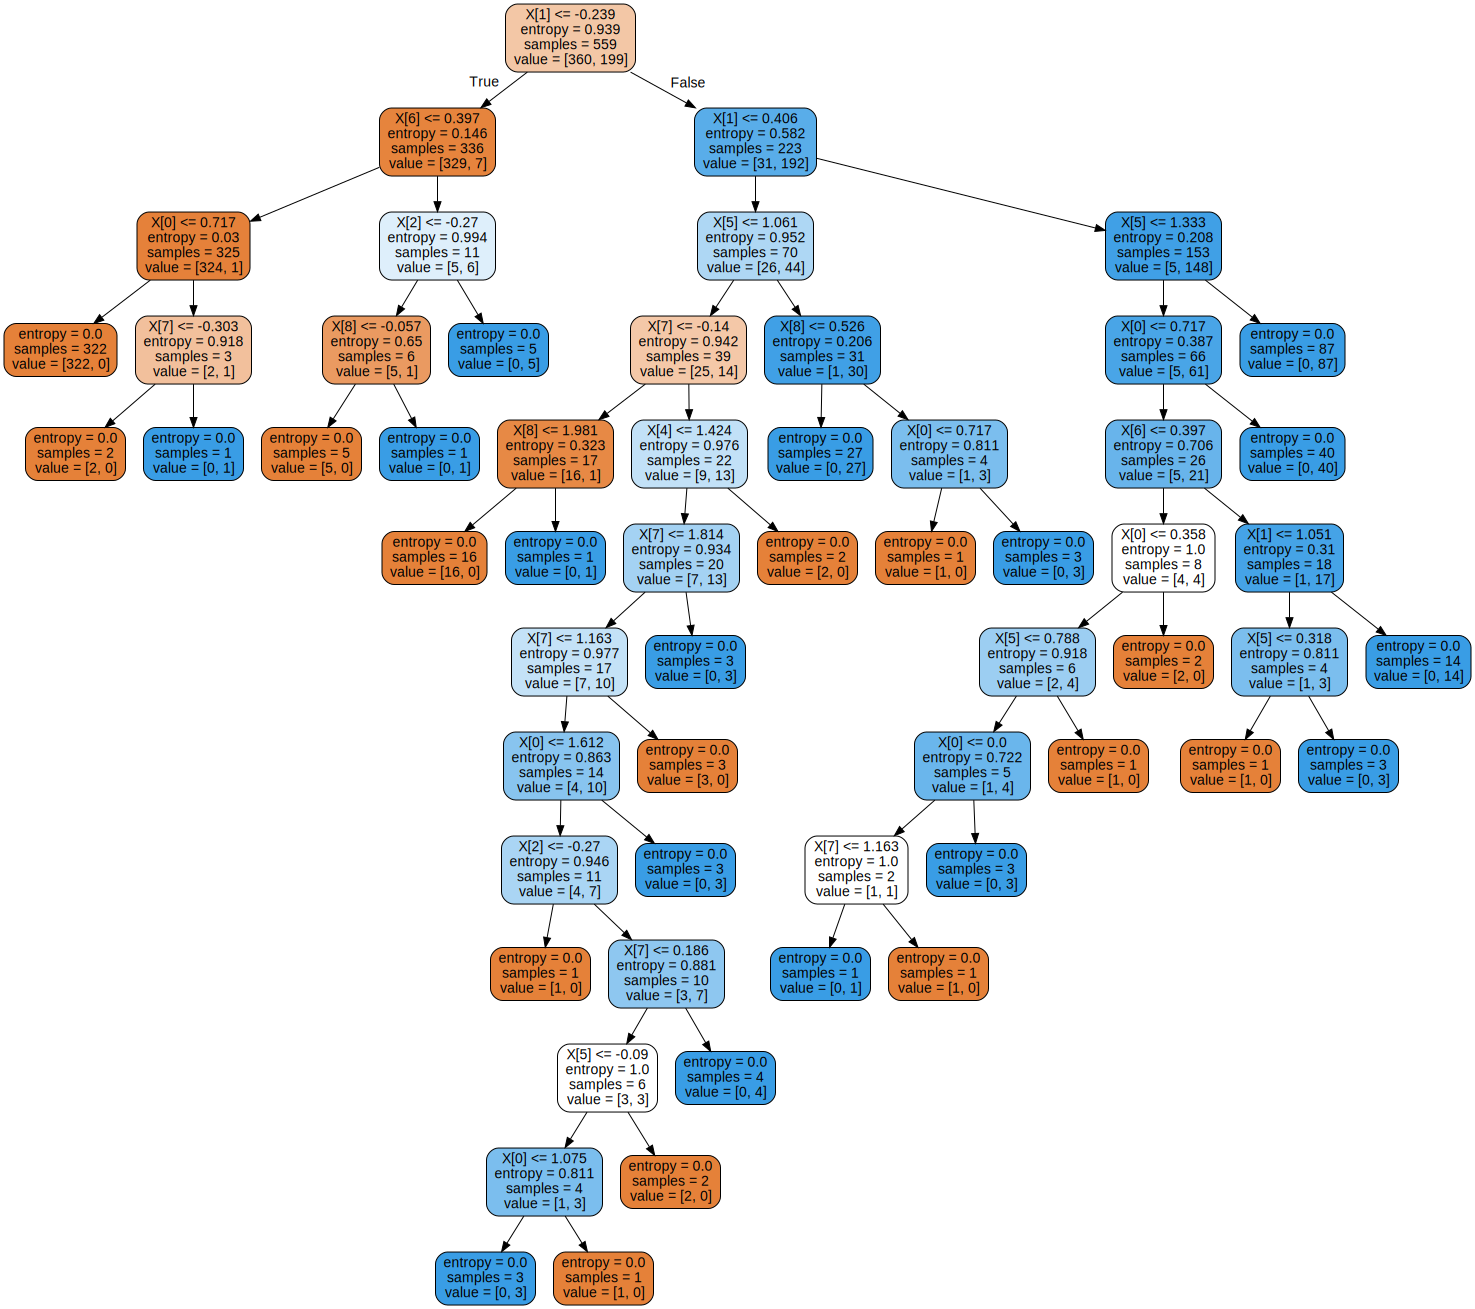

In [39]:
from sklearn.tree import export_graphviz, plot_tree
import graphviz

graphviz.Source(export_graphviz(dt,filled=True, rounded=True))

## Random Forest Model

In [40]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 192)
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=192)

## Random Forest Prediction

In [41]:
Predict(rf, X_test, y_test)

First 10 Actual vs. Predicted:

Observation # 	 Actual 	 Predicted
1 		 4 		 4
2 		 2 		 2
3 		 2 		 2
4 		 4 		 2
5 		 2 		 2
6 		 2 		 2
7 		 2 		 2
8 		 2 		 2
9 		 2 		 2
10 		 2 		 2


## Random Forest Confusion Matrix

In [42]:
ConfusionMatrixAndAccuracy(y_test)


    Confusion Matrix
             Predicted 0 Predicted 1
    Actual 0     97          1
    Actual 1     5          37
    
R-squared: 95.71%
Number of false positives: 1
Number of false positives: 5


Therefore, we found that the R-squared values of the following classification models are:

Logistic Regression: *96.43%*

K-Nearest Neighbors (K-NN): ***97.14%***

Support Vector Machine (SVM): ***97.14%***

Kernel Support Vector Machine (Kernal SVM): ***97.14%***

Naive Bayes: *95.71%*

Decision Tree: *92.86%*

Random Forest: *95.71%*

Therefore, the K-Nearest Neighbors (K-NN), Support Vector Machine (SVM), and Kernal SVM were the best, yielding the accuracy of 97.14%